# Time Series Analysis

Zhentao Shi


<img src="graph/yellowriver.jpg" width="1000">

* Practical topics
* Useful in business contexts
* Modeling choices and challenges

* Time Series Regression
* Univariate Time Series Models
* Nonstationary Time Series
* Multivariate Time Series

* Traditionally, small models
* High dimensional time series modeling is work in progress
* Predictive regression


This notions can be extended to multiple-variate time series, for example $(y_t, x_t, e_t)$.

### Common Operations

* Lag Operator

$$L x_t = x_{t-1}$$
$$L^{\tau} x_t = x_{t-\tau}$$ 

* Difference operator
$$\Delta x_t = x_t - x_{t-1} = (1-L) x_t$$

# Stationary Time Series

For a univariate time series $(y_t)_{t= - \infty} ^ {\infty}$,
* **Strictly stationary**: joint distribution of any finite coordinate only depends on their relative position.
* **Weakly stationary**: the first two moments of any pair $y_t$ and $y_s$ only depends on their relative position.
    * $E[y_t] = \mu$ for all $t$
    * $\mathrm{var}[y_t] = \sigma^2$ for all $t$
    * $\mathrm{cov}[y_t, y_{t+\tau} ] $ only depends on $\tau$ independent of $t$



This notion can be extended to multiple-variate time series, for example $(y_t, x_t, e_t)$.

### Distributed Lags

* Lagged $x$ on the right-hand side

$$
y_t = \alpha + \sum_{j=0}^{\infty} \beta_j  x_{t-j} + e_t = \alpha + B(L) x_t + e_t 
$$

where $$B(L) = \sum_{j=0}^{\infty} \beta_j L^i$$ is a polynomial of the lag operators.

## Autoregressive model

* Lagged $y$ on the right-hand side

$$
y_t = \alpha + \sum_{j=1}^p \gamma_j y_{t-j} + e_t 
$$ 

can be written as 

$$
C(L) y_t = \alpha + e_t
$$ 

where 

$$
C(L) = 1 -\gamma_1 L - \cdots - \gamma_p L^p
$$ 

is a polynomial of the lag operators.

# Invertibility

If the roots of the polynomial equation $C(z) = 0$ **all** lies **outside** of the unit circle, we say the autoregressive model is invertible.



If $e_t$ is stationary with finite variance and $\alpha=0$ (homogenous difference equation):
* If the module of the smallest root is bigger than 1, $y_t$ is a stationary time series
* If the module of the smallest root is equal to 1, $y_t$ is a **unit root** process
* If the module of the smallest root is smaller than 1, $y_t$ is an **explosive** process


### Numerical Example

* $C(L) = 1 - 0.5L$ is invertible.
* $C(L) = 1 - L$ is non-invertible.
* $C(L) = 1 - 1.1L$ is non-invertible.

In [6]:
import numpy as np

def AR(b, T):
    y = np.zeros(T)
    for t in range(T):
        if t > 0:
            y[t] = b * y[t - 1] + np.random.normal()
    return y


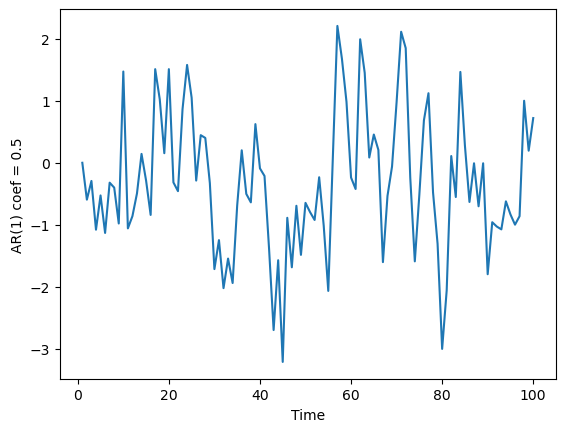

In [15]:
import matplotlib.pyplot as plt

T = 100
alpha = 0.5
y = AR(alpha, T)

plt.plot(range(1, T+1), y)
plt.xlabel("Time")
plt.ylabel(f"AR(1) coef = {alpha}")
plt.show()


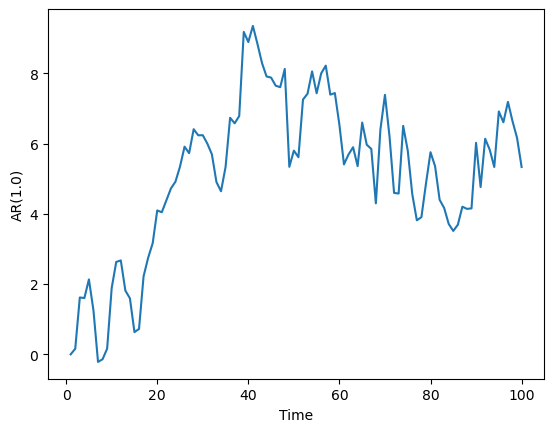

In [39]:
# import matplotlib.pyplot as plt

T = 100
y = AR(1.0, T)

plt.plot(range(1, T+1), y)
plt.xlabel("Time")
plt.ylabel("AR(1.0)")
plt.show()


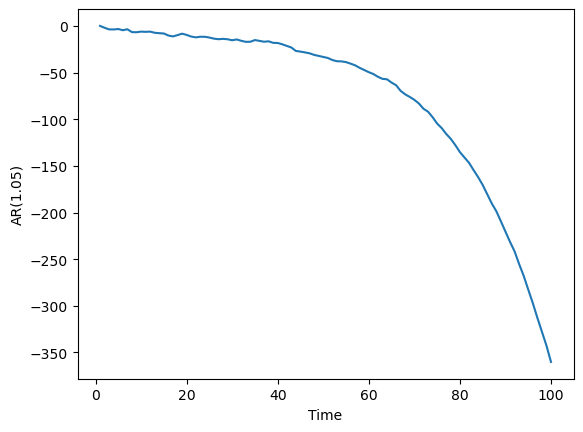

In [33]:
# import matplotlib.pyplot as plt

T = 100
y = AR(1.05, T)

plt.plot(range(1, T+1), y)
plt.xlabel("Time")
plt.ylabel("AR(1.05)")
plt.show()


### Autoregressive Distributed Lag Models


* ARDL(p,r) model:

$$
C(L) y_t = \mu + B(L) x_t + e_t 
$$ 

where 

$$
C(L) = 1 -\gamma_1 L - \cdots - \gamma_p L^p
$$

and 

$$
B(L) =  \beta_0 + \beta_1 L + \cdots + \beta_r L^r.
$$

* **Granger causality**: 

$$
\beta_0 = \beta_1 = \cdots = \beta_r = 0
$$

### Example

* In simple regression form

$$
y_t = \beta_1 + \beta_2 x_t + \beta_3 x_{t-1} + \gamma y_{t-1} + e_t
$$

* Temporal lags of effect. eg: policy lag
* Expectation formed from the past. eg: forecast
* Explicitly depends on history. eg: wealth accumulation


In [1]:
from pandas_datareader import data as pdr
import pandas as pd

# yf.pdr_override()

POILBREUSDQ = pdr.get_data_fred('POILBREUSDQ') # Brent Oil price
IPB50001SQ = pdr.get_data_fred('IPB50001SQ') # industrial Index (quarterly data)

d0 = pd.merge(POILBREUSDQ, IPB50001SQ, left_index=True, right_index=True).dropna()
d0 = d0.assign(x = pd.Series(d0['POILBREUSDQ'], index=d0.index))
d0 = d0.assign(y = pd.Series(d0['IPB50001SQ'], index=d0.index))

del POILBREUSDQ, IPB50001SQ

print(d0.head())

C:\Users\zhent\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


            POILBREUSDQ  IPB50001SQ          x        y
DATE                                                   
2020-04-01    33.377157     87.4555  33.377157  87.4555
2020-07-01    43.434633     95.6082  43.434633  95.6082
2020-10-01    45.344592     97.2275  45.344592  97.2275
2021-01-01    61.127783     97.5045  61.127783  97.5045
2021-04-01    69.139928     99.0556  69.139928  99.0556


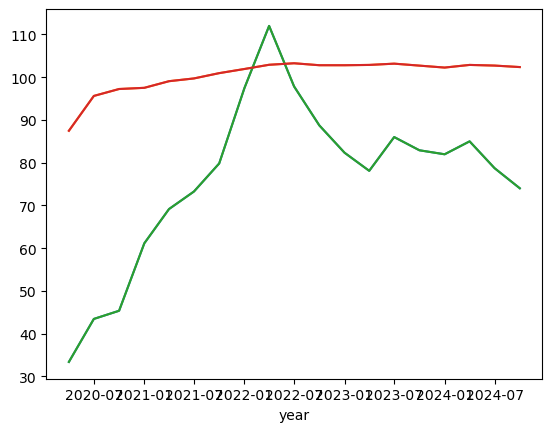

In [2]:
import matplotlib.pyplot as plt

plt.plot(d0.index, d0)
plt.title("")
plt.xlabel("year")
plt.ylabel("")
plt.show()

### ARDL(1,1) regression example

* In R, `dynlm` package
* Python does not directly support dynamic linear models
    * Manually define the lagged variables

In [3]:
import pandas as pd
import statsmodels.api as sm

# Assuming d0 is a pandas DataFrame with columns 'y' and 'x'
d0['y_lag1'] = d0['y'].shift(1)



# Create 12 lags for 'x'
for i in range(1, 13):
    d0[f'x_lag{i}'] = d0['x'].shift(i)

# Drop the rows with NaN values (which were introduced by shifting)
d0 = d0.dropna()

# Define the independent variables
X = d0[['y_lag1'] + [f'x_lag{i}' for i in range(1, 5)]]
X = sm.add_constant(X)  # Add a constant (intercept term)

# Define the dependent variable
y = d0['y']

# Perform the regression
model = sm.OLS(y, X)
results = model.fit()

# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     3.974
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.363
Time:                        21:20:57   Log-Likelihood:                 9.3703
No. Observations:                   7   AIC:                            -6.741
Df Residuals:                       1   BIC:                            -7.065
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        255.6530    110.082      2.322      0.2

C:\Users\zhent\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Put difference variables in the right-hand side.

In [4]:
import pandas as pd
import statsmodels.api as sm

# Assuming d0 is a pandas DataFrame with columns 'y' and 'x'
d0['d_y'] = d0['y'].diff()  # First difference of 'y'
d0['d_x'] = d0['x'].diff()  # First difference of 'x'
d0['y_lag1'] = d0['y'].shift(1)
d0['d_x_lag0'] = d0['d_x'].shift(0)
d0['d_x_lag1'] = d0['d_x'].shift(1)

# Drop the rows with NaN values (which were introduced by shifting)
d0 = d0.dropna()

# Define the independent variables
X = d0[['y_lag1', 'd_x_lag0', 'd_x_lag1']]
X = sm.add_constant(X)  # Add a constant (intercept term)

# Define the dependent variable
y = d0['d_y']

# Perform the regression
model = sm.OLS(y, X)
results = model.fit()

# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    d_y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     10.23
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.225
Time:                        21:21:21   Log-Likelihood:                 6.0568
No. Observations:                   5   AIC:                            -4.114
Df Residuals:                       1   BIC:                            -5.676
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        211.7075     52.459      4.036      0.1

C:\Users\zhent\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "



# Spurious Regression


* The two time series $\{y_t\}$ and $\{x_t\}$ are generated independently, so that $E[y_t|x_t] = 0$. 
* However, we observe a high $R^2$ and large t-value if we regression $y_t$ against $x_t$.


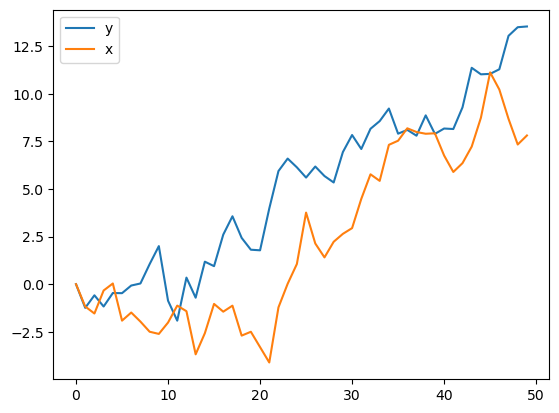

In [8]:
import matplotlib.pyplot as plt

T = 50
a = 1

y = AR(a, T)
x = AR(a, T)

plt.plot(y, label="y")
plt.plot(x, label="x")
plt.ylabel("")
plt.legend()
plt.show()

In [31]:
import statsmodels.api as sm

reg = sm.OLS(y, sm.add_constant(x)).fit()

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     8.349
Date:                Sat, 16 Mar 2024   Prob (F-statistic):            0.00578
Time:                        21:30:44   Log-Likelihood:                -122.43
No. Observations:                  50   AIC:                             248.9
Df Residuals:                      48   BIC:                             252.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5661      0.740     -0.765      0.4

### Discovery

* Granger and Newbold (1974): If we naively use 1.96 as the critical value for the $t$-ratio, how often we would reject the null hypothesis that $\beta = 0$?  

* The nominal asymptotic test size is $5\%$ according to the standard asymptotic theory
* The empirical size is about 0.80 in this simulation
* The drastic deviation suggests that the standard asymptotic theory fails in the nonstationary environment.


In [9]:
import numpy as np
import pandas as pd

def spurious(i, a, T):
    y = AR(a, T)
    x = AR(a, T)

    reg = sm.OLS(y, sm.add_constant(x)).fit()
    p_val = reg.pvalues[1]
    # save the p-value of the estimate of x's coefficient
    return p_val

out = []
for i in range(1000):
    p_val = spurious(i, 1.0, 100)
    out.append(p_val)

print("rejection probability = ", np.mean(np.array(out) < 0.05))


rejection probability =  0.767


## Autoregression and Moving Average

* Box-Jenkins (1976): ARMA
* No economic theory. For fitting and prediction only.

### Simple Building Block

* White noise: $(e_t)_{t=-\infty}^{\infty}$:
    * $E[e_t] = 0$, $E[e_t^2] = \sigma_e^2$, and $E[e_t, e_s] = 0$ for all $t\neq s$. 

# ARMA


* AR(p) $$ y_t = \mu + \gamma_1 y_{t-1} + \cdots \gamma_p y_{t-p} + e_t $$
* MA(q) $$ y_t = \mu + e_t - \theta_1 e_{t-1} - \theta_q e_{t-q} + e_t $$
* ARMA(p,q) $$(1-\Gamma(L) ) y_t = \mu + \Theta (L) e_t$$

Stationarity: in AR form whether all roots lies out of the unit cycle.

# Autocorrelation Patterns


* MA(q): finite dependence
* AR(1): geometric decline
    * $E[ y_t ] = \mu / (1-\gamma_1)$
    * $\mathrm{var}[y_t] = \sigma_e^2 / (1-\gamma_1^2 )$
    * $E[ y_t | y_{t-1} ] = \mu + \gamma_1 y_{t-1}$
    * $\mathrm{var}[y_t | y_{t-1} ] = \sigma_e^2 $
    


# Modeling

* ARIMA(p, r, q) $$(1-\Gamma(L) ) \Delta^r y_t = \mu + \Theta (L) e_t$$
* Transform into stationary time series by taking logarithm and/or difference.
* Fit ARMA(p,q)

In [35]:
reg1 = sm.tsa.ARIMA(d0['x'], order=(2,0,3)).fit()
print(reg1.summary())

C:\Users\zhent\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zhent\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zhent\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                   74
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 -95.847
Date:                Sat, 16 Mar 2024   AIC                            205.694
Time:                        21:32:00   BIC                            221.823
Sample:                             0   HQIC                           212.128
                                 - 74                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7352      1.726      1.005      0.315      -1.649       5.119
ar.L1          0.4914      1.286      0.382      0.702      -2.030       3.013
ar.L2          0.4161      1.231      0.338      0.7

In [36]:
reg2 = sm.tsa.ARIMA(d0['x'], order=(2,1,3)).fit()
print(reg2.params)

C:\Users\zhent\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zhent\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zhent\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ar.L1    -1.503921
ar.L2    -0.974856
ma.L1     1.537285
ma.L2     0.931975
ma.L3    -0.042027
sigma2    0.676076
dtype: float64


C:\Users\zhent\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Seasonality

* Generated due to sampling frequency
  * Eg: traffic data; electronic consumption
* Add dummies to control seasonality

# Estimation

* MLE for MA(q)
* MLE for ARMA(p,q)
* OLS for AR(p)

# Model Choice

Information criteria. 

Let $k$ be the total number of slope coefficient in the model.

* Akaike information criterion: $\log( \hat{\sigma}^2 ) + 2\times (k / T )$. 
    * Tend to overfit, but better for prediction
* Bayesian information criterion: $\log( \hat{\sigma}^2 ) + \log(T) \times (k / T )$
    * Model selection consistent
    
Information criteria are not restricted to time series regressions. They are general statistical measures for model/variable selection.

In [37]:
print(reg1.aic)
print(reg2.aic)

205.6943399319762
194.55294408111783


# Unit Root

* AR(1) with AR coefficient equals 1. $$y_t = \mu + y_{t-1} + e_t $$
* Nonstationary
* Brownian motion: normal innovation
* Random walk

## Implication
* conditional and unconditional mean
* conditional and unconditional variance
* $h$-period ahead forecast

## Distribution
The OLS estimator 

$$
T(\hat{\gamma}_1 - 1) \stackrel{d}{\to} \text{ a stable distribution}.
$$

but the asymptotic distribution is not normal. 

[*********************100%%**********************]  1 of 1 completed


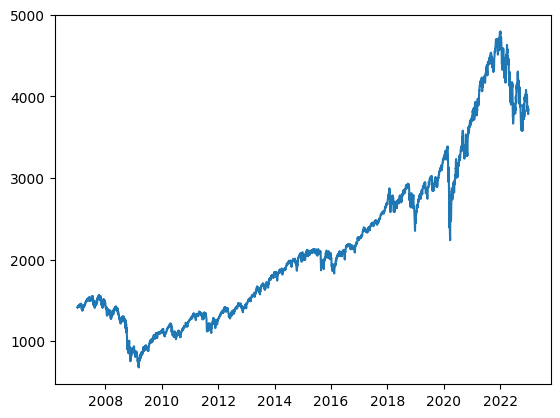

Date
2022-12-23    3844.820068
2022-12-27    3829.250000
2022-12-28    3783.219971
2022-12-29    3849.280029
2022-12-30    3839.500000
Name: Close, dtype: float64


In [39]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
import yfinance as yf

# Download S&P 500 (^GSPC) data
start_date = '2007-01-01'
end_date = '2024-01-01'
ticker = '^GSPC'
sp500_data = yf.download(ticker, start=start_date, end=end_date)
y = sp500_data['Close']

plt.plot(y)
plt.show()

print(y.tail())

### Hypothesis Testing

* Null hypothesis: unit root.
$$ \Delta y_t = \mu + (\gamma_1 - 1 ) y_{t-1} + e_t = \mu+ \theta y_{t-1} + e_t$$
where $ \theta = \gamma_1 - 1 $. Under the null, $\theta = 0$.

* The $t$-statistic is the test statistic for the Dicky-Fuller test.
* Under the null, the $t$-statistic asymptotically follows a pivotal distribution.


### Numerical Example


* In this numerical example, the test does not reject the null.

Notice: the test is one-sided.


In [40]:
from statsmodels.tsa.stattools import adfuller
y = sp500_data['Close']
result = adfuller(y, regression='c', autolag='AIC')
print('ADF Statistic: ', result[0])
print('p-value: ', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(key, value)

ADF Statistic:  0.019030394172680362
p-value:  0.96007787461591
Critical Values:
1% -3.4319858753661405
Critical Values:
5% -2.8622628402506254
Critical Values:
10% -2.5671547755625


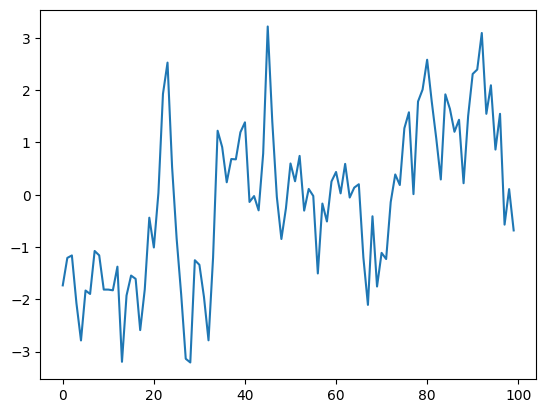

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

y = sm.tsa.ArmaProcess(ar=[1, -0.8], ma=[1]).generate_sample(nsample=100)

plt.plot(y)
plt.show()



In [42]:
# conduct Dicky-Fuller test for y

result = adfuller(y, regression='c', autolag='AIC')
print('ADF Statistic: ', result[0])
print('p-value: ', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(key, value)

ADF Statistic:  -3.6102011024495693
p-value:  0.005568972783571586
Critical Values:
1% -3.498198082189098
Critical Values:
5% -2.891208211860468
Critical Values:
10% -2.5825959973472097


### Simulation Dicky-Fuller Distribution

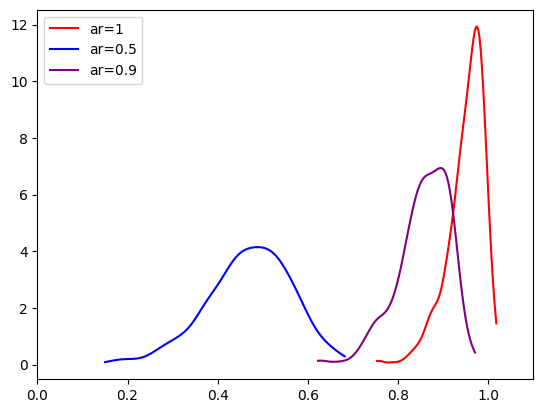

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from scipy.stats import gaussian_kde

def generate_ar_series(ar, n):
    y = np.zeros(n)
    e = np.random.randn(n)

    for i in range(1, n):
        y[i] = ar * y[i - 1] + e[i]

    return y

def DF_sim(ar):
    Rep = 500
    n = 100

    B_hat = np.zeros(Rep)

    for r in range(Rep):
        y = generate_ar_series(ar, n)
        reg_dyn = OLS(y[1:], np.vstack([np.ones(n-1), y[:-1]]).T).fit()
        B_hat[r] = reg_dyn.params[1]

    return B_hat

def plot_density(B, color, label):
    density = gaussian_kde(B)
    x = np.linspace(min(B), max(B), 100)
    plt.plot(x, density(x), color=color, label=label)

B = DF_sim(1)
plot_density(B, color="red", label="ar=1")

B = DF_sim(0.5)
plot_density(B, color="blue", label="ar=0.5")

B = DF_sim(0.9)
plot_density(B, color="purple", label="ar=0.9")

plt.xlim(0, 1.1)
plt.legend()
plt.show()

## Specification of DF test

* The error term must be a white noise for the DF distribution
* DF test's critical values vary with the specfication of drift and/or trend
* Augmented Dicky-Fuller test: add more differenced lag terms

## Other tests
* Phillips-Perron test
* KPSS test

In [45]:
from arch.unitroot import PhillipsPerron

pp_test = PhillipsPerron(y)
print(pp_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.533
P-value                         0.007
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.50 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [46]:
from statsmodels.tsa.stattools import kpss

result = kpss(y, regression='c')
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[3].items():
    print(key, value)

KPSS Statistic: 0.9513290910911473
p-value: 0.01
Critical Values:
10% 0.347
5% 0.463
2.5% 0.574
1% 0.739


C:\Users\zhent\AppData\Local\Temp\ipykernel_26348\1684529852.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(y, regression='c')


# Cointegration

In a regression
$$y_t = \beta x_t  + e_t$$

* If $y_t$ and $x_t$ are I(1) series
* But a linear combination $e_t = y_t - \beta x_t $ is I(0)

then we say $y_t$ and $x_t$ are cointegrated.

[*********************100%%**********************]  1 of 1 completed


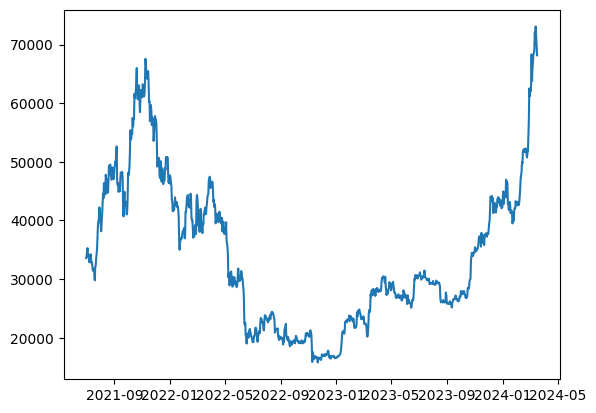

[*********************100%%**********************]  1 of 1 completed


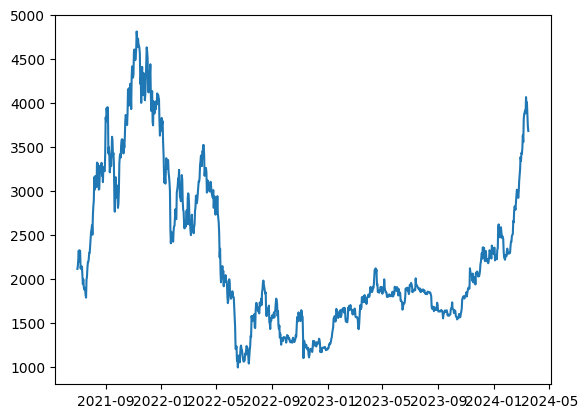

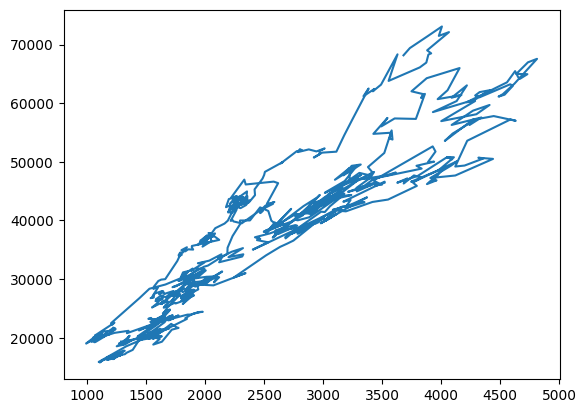

In [48]:
import yfinance as yf
import matplotlib.pyplot as plt

BTC = yf.download("BTC-USD", start="2021-07-01")["Close"]
plt.plot(BTC)
plt.show()

ETH = yf.download("ETH-USD", start="2021-07-01")["Close"]
plt.plot(ETH)
plt.show()

plt.plot(ETH.values, BTC.values)
plt.show()


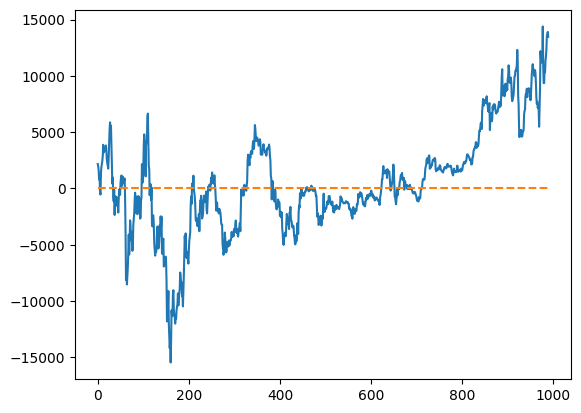

In [49]:
import statsmodels.api as sm

# Convert BTC and ETH to NumPy arrays
BTC = BTC.values
ETH = ETH.values

# Fit linear regression model
reg = sm.OLS(BTC, ETH).fit()

# Plot residuals
plt.plot(reg.resid)
plt.plot([0, len(reg.resid)], [0, 0], linestyle='--')
plt.show()

In [50]:
from statsmodels.tsa.stattools import adfuller

# Calculate ADF test on residuals
adf_result = adfuller(reg.resid, autolag='AIC')

# Print summary of ADF test results
print("ADF Test Results:")
print(f"Test Statistic: {adf_result[0]}")
print(f"P-value: {adf_result[1]}")
print(f"Critical Values: {adf_result[4]}")

ADF Test Results:
Test Statistic: -1.818598251952432
P-value: 0.3712680497541245
Critical Values: {'1%': -3.436979275944879, '5%': -2.8644668170148058, '10%': -2.5683283824496153}


# Source of Cointegration

Common shock is the source of cointegration

For example, if $y_{1t} = \mu_1 + \beta_1 t + e_{1t}$ and $y_{2t} = \mu_2 + \beta_2 t + e_{2t}$, where $e_{1t}$ and $e_{2t}$ are two white noises, then the cointegration vector must be $(1,\theta)$ where $$\theta = - \beta_1 / \beta_2.$$ The first coefficient 1 in this cointegration vector is for normalization.

In this example, the common trend is a determistic one. In other examples, they can also share a stochastic trend.

## Definitions

More generally, for an $m$-vector $y_t$ is cointegrated if there exists a parameter vector $\gamma$ (normalize the first element to be 1) such that $y_t ' \gamma$ is I(0).



* The number of linear independent cointegrated vectors is called the **cointegration rank**. 
  * Cointegration rank arranges from 1 to $m-1$.

# Error Correction Model

* Consider an ARDL(1,1) model

$$ 
y_t  = \mu + \beta_0 x_t + \beta_1 x_{t-1} + \gamma_1 y_{t-1} + e_t. 
$$

* If $\beta_0 = \beta_1 = 0$, no **Granger causality** between $X$ and $Y$.
* Granger causality is a linear predictive relationship



### Reformulation

* When $X$ and $Y$ are both nonstationary, standard OLS inference is invalid. 

* Subtract $y_{t-1}$ from both sides of 

$$
\begin{align*}
\Delta y_t & = \mu + \beta_0 x_t + \beta_1 x_{t-1} + (\gamma_1 -1 ) y_{t-1} + e_t  \\
           & = \mu + \beta_0 \Delta x_t + (\beta_1 + \beta_0) x_{t-1} + (\gamma_1 -1 ) y_{t-1} + e_t  \\
           & = \mu + \beta_0 \Delta x_t + (\gamma_1 -1 )( y_{t-1} - \theta x_{t-1} ) + e_t  
\end{align*}
$$

where $\theta =  (\beta_1 + \beta_0)/(1 - \gamma_1)$.

* A short-run relationship $\Delta y_t \sim \mu + \beta_0 \Delta x_t + e_t$.
* An long-run equilibrium error $(\gamma_1 - 1 ) (y_{t-1} - \theta x_{t-1} ) $
  * Corrects the error term the differenced regression to maintain $\beta_0$

ECM is useful when $y_t$ is nonstationary


* First difference recovers stationarity
* Identify spurious regression (when $\beta_0 = 0$)
* ECM can be estimated either by 
  * OLS or NLS (constraints among parameters)
  * MLE

# Predictive Regression

In the regression 

$$
y_t = \mu_y + \beta_1 x_{t-1} + e_{yt}
$$

* $y_t$ is stationary 
* The predictor $x_t$ is highly persistent:

$$
x_t = \mu_x + \gamma x_{t-1} + e_{xt}
$$ 

with $\gamma$ is close to 1.

* Even if $E[e_{yt} | x_{t-1} ] = 0$, OLS estimator of $\beta_1$ is biased in finite sample when $e_{yt}$ and $e_{xt}$ are correlated (Stambaugh, 1999).

* Welch and Goyal: "[A Comprehensive Look at the Empirical Performance of Equity Premium Prediction](https://drive.google.com/file/d/1uvjBJ9D09T0_sp7kQppWpD-xelJ0KQhc/view)", ([dataset](https://docs.google.com/spreadsheets/d/1OArfD2Wv9IvGoLkJ8JyoXS0YMQLDZfY2/edit?usp=sharing&ouid=113571510202500088860&rtpof=true&sd=true))

* Find new behavior of popular machine learning methods in predictive regression.

In [51]:
import pandas as pd

# Read the CSV file
d0 = pd.read_csv("data_example/PredictorData2021.csv")

# Filter the data
d0 = d0[d0['yyyymm'] > 196000]

# Select specific columns
d0 = d0.iloc[:, [0, 1, 4, 5, 8, 9, 11, 12, 13, 14, 15, 10]]

# Print the first few rows of the DataFrame
print(d0.head())


      yyyymm  Index       b/m     tbl     lty      ntis      infl     ltr  \
1068  196001  55.61  0.499502  0.0435  0.0441  0.022116 -0.003401  0.0112   
1069  196002  56.12  0.493557  0.0396  0.0429  0.024037  0.003413  0.0204   
1070  196003  55.34  0.549798  0.0331  0.0411  0.025593  0.000000  0.0282   
1071  196004  54.37  0.563404  0.0323  0.0426  0.025577  0.003401 -0.0170   
1072  196005  55.83  0.541966  0.0329  0.0417  0.024414  0.000000  0.0152   

       corpr      svar       csp   Rfree  
1068  0.0107  0.000919  0.000889  0.0033  
1069  0.0128  0.001150  0.000661  0.0029  
1070  0.0191  0.000969  0.000361  0.0035  
1071 -0.0022  0.000645  0.000121  0.0019  
1072 -0.0021  0.000424 -0.000036  0.0027  


# Vector Autoregression (VAR)

Christopher Sims (Nobel Prize 2011)

An $m$-equation system
$$ y_t = \mu + \Gamma_1 y_{t-1} + \cdots + \Gamma_p y_{t-p} + v_t $$
where $E[ v_t v_t'] = \Omega$.

For prediction purpose, as a reduced-form of structural simultaneous equations.

### Estimation

* For consistency and asymptotic normality, use OLS equation by equation
* For asymptotic efficient, use multiple-equation GLS



# Invertibility

Write the VAR(p) as
$$ (I_m - \Gamma (L) ) y_t = \mu + v_t $$ 
where $\Gamma(z) = \Gamma_1 z + \cdots + \Gamma_p z^p$. 

Stable means that all roots of the $p$th order polynomial equation $$ I_m - \Gamma(z)  = 0_m $$ lies out of the unit circle.

# Impulse Response Function

IRF characterizes the diffusion of an exogenous shock with the dynamic system.

$$
\begin{align*}
y_t & = (I_m - \Gamma(L) )^{-1} (\mu + v_t) \\
    & = \bar{y} + \left( v_t + \sum_{i=1}^{\infty} A_i v_{t-i} \right)
\end{align*}
$$ where $\bar{y} = (I_m - \Gamma(L) )^{-1} \mu = ( I_m + \sum_{i=1}^{\infty} A_i ) \mu $.

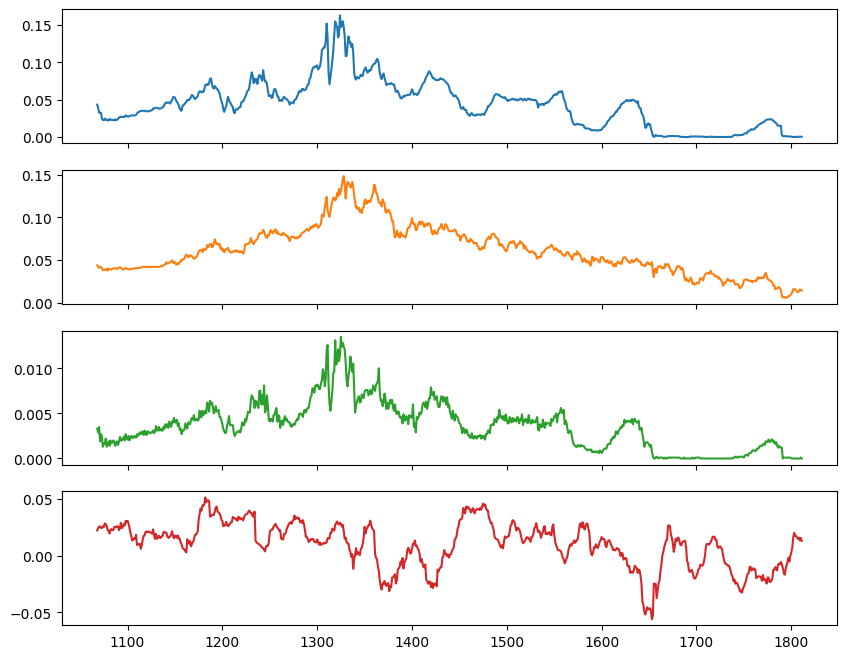

In [52]:
import matplotlib.pyplot as plt

# Select specific columns
d1 = d0[['tbl', 'lty', 'Rfree', 'ntis']]

# Plot the data
d1.plot(subplots=True, layout=(4, 1), figsize=(10, 8), title="", legend=False)
plt.show()


## Variables

* `ntis`: net equity expansion
* `tbl`: treasury bill rates () The stationary predictors
* `lty`: long-term yield
* `Rfree`: risk-free rate

In [53]:
import statsmodels.tsa.api as tsa

# Fit a VAR model with lag order 2
mod_var = tsa.VAR(d1).fit(2)

# Print the model summary
print(mod_var.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 16, Mar, 2024
Time:                     21:37:35
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -49.8867
Nobs:                     742.000    HQIC:                  -50.0241
Log likelihood:           14415.5    FPE:                1.72731e-22
AIC:                     -50.1103    Det(Omega_mle):     1.64598e-22
--------------------------------------------------------------------
Results for equation tbl
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -0.000209         0.000370           -0.563           0.573
L1.tbl           1.274885         0.039094           32.611           0.000
L1.lty           0.396384         0.051362            7.718           0.000
L1.Rfr

C:\Users\zhent\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


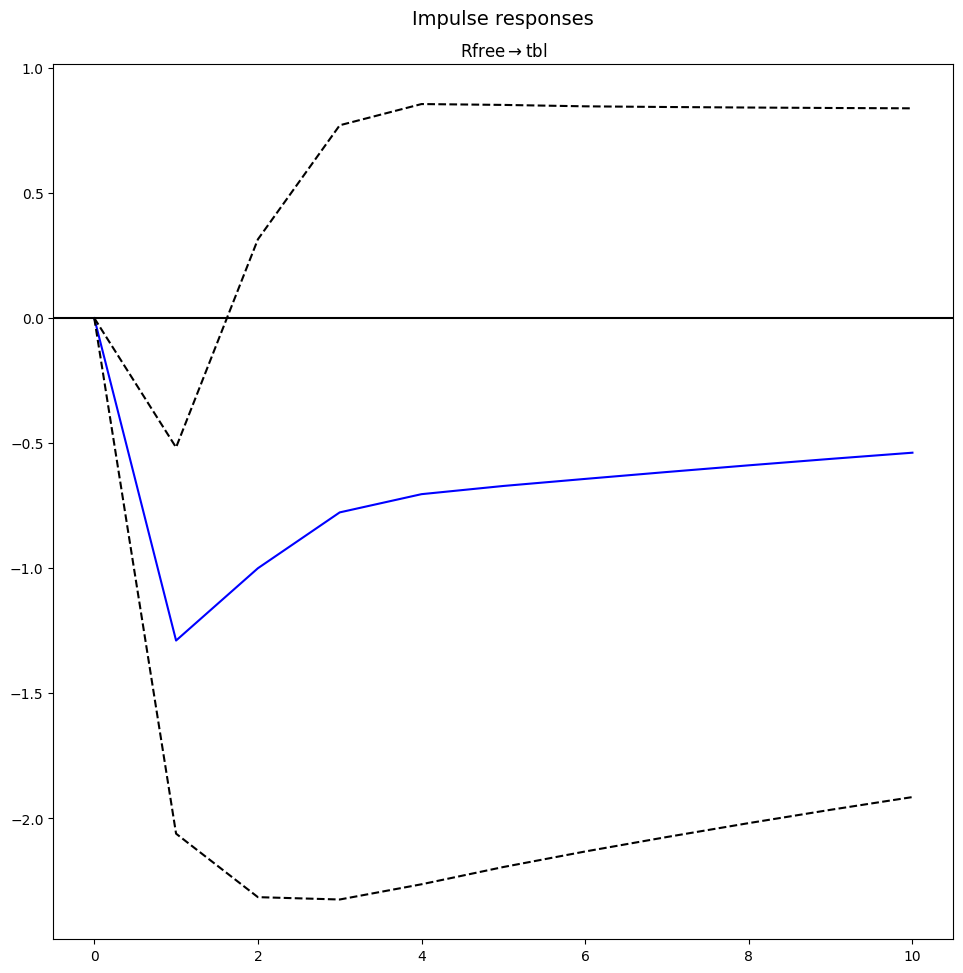

In [54]:
import matplotlib.pyplot as plt

# Compute the impulse response function
irf_var = mod_var.irf(10)  # Choose the number of periods for IRF, e.g., 10

# Plot the IRF
irf_var.plot(impulse='Rfree', response='tbl')
plt.show()


#  Future of Time Series Study

* Classical methods
* Time series model for discrete choice model
* Time series dimension of big data
    * Unstructured data
    * Panel data
* Recurrent neural network, LSTM, etc...